In [1]:
#Cargando las librerías 

import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd
import numpy as np



In [2]:
#Creando variables para valores nulos
sentinels = {'PRECIP': ['Nulo'],'EVAP':['Nulo'],'TMAX':['Nulo'],'TMIN':['Nulo']}

In [3]:
#Leyendo el archivo
df0 = pd.read_csv("cajeme.txt",skiprows=0,sep='\s+',na_values=sentinels)

In [4]:
#Definiendo el dataframe
df = pd.DataFrame(df0)

In [5]:
#Cambiando la columna de fecha a formato fecha
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)

In [6]:
#Mostrando primeros 5 valores
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN
0,0.0,1.2,25.0,7.0,1980-01-01
1,0.0,1.7,22.0,8.0,1980-01-02
2,0.0,1.9,25.0,9.0,1980-01-03
3,0.0,1.8,26.0,6.0,1980-01-04
4,0.0,2.0,26.0,4.0,1980-01-05


In [7]:
#Mostrando 5 últimos valores
df.tail()

,PRECIP,EVAP,TMAX,TMIN,FECHAN
10526,0.0,NaN,26.0,4.0,2011-12-27
10527,0.0,NaN,27.5,7.0,2011-12-28
10528,0.0,NaN,27.0,8.0,2011-12-29
10529,0.0,NaN,28.5,7.0,2011-12-30
10530,0.0,NaN,28.0,7.5,2011-12-31


In [8]:
#Mostrando los tipos en el archivo
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAN    datetime64[ns]
dtype: object

In [9]:
#Calculando promedio de los valores
df.mean()

PRECIP     0.894511
EVAP       5.814091
TMAX      32.601047
TMIN      14.880873
dtype: float64

In [10]:
#Calculando la desviación estándar de los valores
df.std()

PRECIP    5.948456
EVAP      2.431426
TMAX      5.770682
TMIN      6.881583
dtype: float64

In [11]:
#Calculando la mediana de los datos
df.median()

PRECIP     0.0
EVAP       5.5
TMAX      33.0
TMIN      13.0
dtype: float64

In [12]:
#Calculando el valor máximo de los datos
df.max()

PRECIP                  184.5
EVAP                     14.9
TMAX                     47.5
TMIN                       29
FECHAN    2011-12-31 00:00:00
dtype: object

In [13]:
#Calculando el valor mínimo de los datos
df.min()

PRECIP                      0
EVAP                      0.2
TMAX                       13
TMIN                     -2.5
FECHAN    1980-01-01 00:00:00
dtype: object

In [14]:
#Descripción general de los datos
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,10531.000000,7324.000000,10503.000000,10514.000000
mean,0.894511,5.814091,32.601047,14.880873
std,5.948456,2.431426,5.770682,6.881583
min,0.000000,0.200000,13.000000,-2.500000
25%,0.000000,3.900000,28.000000,9.000000
50%,0.000000,5.500000,33.000000,13.000000
75%,0.000000,7.600000,37.500000,22.000000
max,184.500000,14.900000,47.500000,29.000000


In [15]:
##Para precipitaciones máximas
df_tmp = df[df.PRECIP > 90]

df_tmp


,PRECIP,EVAP,TMAX,TMIN,FECHAN
1341,103.0,10.0,35.0,23.0,1984-07-05
3113,100.0,2.8,30.0,20.0,1991-09-10
5278,115.0,11.5,38.0,26.0,1997-08-14
6785,96.5,8.6,33.0,21.5,2001-09-29
6786,136.4,6.2,27.0,17.0,2001-09-30
7856,146.0,NaN,26.0,24.0,2004-09-04
8952,184.5,NaN,28.0,23.0,2007-09-05


In [16]:
#Ubicando el índice de la precipitación máxima y la mínima
imax=df.PRECIP.idxmax()
imax


8952

In [17]:
#Mostrando la fila con el índice encontrado
df.iloc[[imax]]

,PRECIP,EVAP,TMAX,TMIN,FECHAN
8952,184.5,NaN,28.0,23.0,2007-09-05


In [18]:
#Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10531 entries, 0 to 10530
Data columns (total 5 columns):
PRECIP    10531 non-null float64
EVAP      7324 non-null float64
TMAX      10503 non-null float64
TMIN      10514 non-null float64
FECHAN    10531 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 411.4 KB


In [19]:
# Hacemos la columna mes
df['MES'] = df['FECHAN'].dt.month
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES
0,0.0,1.2,25.0,7.0,1980-01-01,1
1,0.0,1.7,22.0,8.0,1980-01-02,1
2,0.0,1.9,25.0,9.0,1980-01-03,1
3,0.0,1.8,26.0,6.0,1980-01-04,1
4,0.0,2.0,26.0,4.0,1980-01-05,1


In [20]:
#Hacemos la columna año
df['AÑO'] = df['FECHAN'].dt.year
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [21]:
#Seleccionando todos los datos de cada mes
df_ENE=df[df.MES==1]
df_FEB=df[df.MES==2]
df_MAR=df[df.MES==3]
df_ABR=df[df.MES==4]
df_MAY=df[df.MES==5]
df_JUN=df[df.MES==6]
df_JUL=df[df.MES==7]
df_AGO=df[df.MES==8]
df_SEP=df[df.MES==9]
df_OCT=df[df.MES==10]
df_NOV=df[df.MES==11]
df_DIC=df[df.MES==12]

In [22]:
#Precipitación acumulada por meses
SP_ENE=df_ENE.PRECIP.sum()
print("Enero = ",SP_ENE)

SP_FEB=df_FEB.PRECIP.sum()
print("Febrero = ",SP_FEB)

SP_MAR=df_MAR.PRECIP.sum()
print("Marzo = ",SP_MAR)

SP_ABR=df_ABR.PRECIP.sum()
print("Abril = ",SP_ABR)

SP_MAY=df_MAY.PRECIP.sum()
print("Mayo = ",SP_MAY)

SP_JUN=df_JUN.PRECIP.sum()
print("Junio = ",SP_JUN)

SP_JUL=df_JUL.PRECIP.sum()
print("Julio = ",SP_JUL)

SP_AGO=df_AGO.PRECIP.sum()
print("Agosto = ",SP_AGO)

SP_SEP=df_SEP.PRECIP.sum()
print("Septiembre = ",SP_SEP)

SP_OCT=df_OCT.PRECIP.sum()
print("Octubre = ",SP_OCT)

SP_NOV=df_NOV.PRECIP.sum()
print("Noviembre = ",SP_NOV)

SP_DIC=df_DIC.PRECIP.sum()
print("Diciembre = ",SP_DIC)

Enero =  772.5
Febrero =  342.3
Marzo =  75.5
Abril =  47.8
Mayo =  18.7
Junio =  111.5
Julio =  1929.3
Agosto =  2138.7
Septiembre =  2438.7999999999997
Octubre =  687.2
Noviembre =  347.2
Diciembre =  510.6


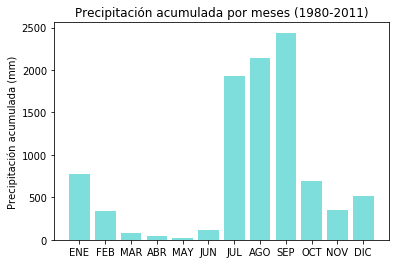

In [23]:
#Creando gráfica para precipitación total en cada mes
Meses = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC')
y_pos = np.arange(len(Meses))
SumPre= [SP_ENE,SP_FEB,SP_MAR,SP_ABR,SP_MAY,SP_JUN,SP_JUL,SP_AGO,SP_SEP,SP_OCT,SP_NOV,SP_DIC]
 
plt.bar(y_pos, SumPre, align='center', alpha=0.7, color='#48D1CC')
plt.xticks(y_pos, Meses)
plt.ylabel('Precipitación acumulada (mm)')
plt.title('Precipitación acumulada por meses (1980-2011)')
plt.savefig('Precipit_mensual',plt=2000)
plt.show()

In [24]:
#Promedio de temperatura mínima por meses
TMIN_ENE=df_ENE.TMIN.mean()
print("ENE = ",TMIN_ENE)

TMIN_FEB=df_FEB.TMIN.mean()
print("FEB = ",TMIN_FEB)

TMIN_MAR=df_MAR.TMIN.mean()
print("MAR = ",TMIN_MAR)

TMIN_ABR=df_ABR.TMIN.mean()
print("ABR = ",TMIN_ABR)

TMIN_MAY=df_MAY.TMIN.mean()
print("MAY = ",TMIN_MAY)

TMIN_JUN=df_JUN.TMIN.mean()
print("JUN = ",TMIN_JUN)

TMIN_JUL=df_JUL.TMIN.mean()
print("JUL = ",TMIN_JUL)

TMIN_AGO=df_AGO.TMIN.mean()
print("AGO = ",TMIN_AGO)

TMIN_SEP=df_SEP.TMIN.mean()
print("SEP = ",TMIN_SEP)

TMIN_OCT=df_OCT.TMIN.mean()
print("OCT = ",TMIN_OCT)

TMIN_NOV=df_NOV.TMIN.mean()
print("NOV = ",TMIN_NOV)

TMIN_DIC=df_DIC.TMIN.mean()
print("DIC = ",TMIN_DIC)


ENE =  7.488407258064516
FEB =  8.010216346153847
MAR =  8.960457856399584
ABR =  11.10344827586207
MAY =  14.390681003584229
JUN =  20.22530864197531
JUL =  24.048984468339306
AGO =  24.32373271889401
SEP =  23.23735632183908
OCT =  18.449944382647384
NOV =  12.217857142857143
DIC =  8.193763919821826


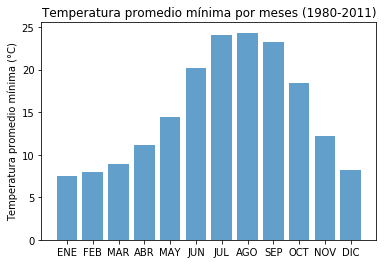

In [25]:
#Creando gráfica para temperatura promedio mínima en cada mes
Meses = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC')
y_pos = np.arange(len(Meses))
SumPre= [TMIN_ENE,TMIN_FEB,TMIN_MAR,TMIN_ABR,TMIN_MAY,TMIN_JUN,TMIN_JUL,TMIN_AGO,TMIN_SEP,TMIN_OCT,TMIN_NOV,TMIN_DIC]
 
plt.bar(y_pos, SumPre, align='center', alpha=0.7)
plt.xticks(y_pos, Meses)
plt.ylabel('Temperatura promedio mínima (°C)')
plt.title('Temperatura promedio mínima por meses (1980-2011)')
plt.savefig('Temperaturaprommin_mensual',plt=2000)
plt.show()

In [26]:
#Promedio de temperatura máxima por meses
TMAX_ENE=df_ENE.TMAX.mean()
print("ENE = ",TMAX_ENE)

TMAX_FEB=df_FEB.TMAX.mean()
print("FEB = ",TMAX_FEB)

TMAX_MAR=df_MAR.TMAX.mean()
print("MAR = ",TMAX_MAR)

TMAX_ABR=df_ABR.TMAX.mean()
print("ABR = ",TMIN_ABR)

TMAX_MAY=df_MAY.TMAX.mean()
print("MAY = ",TMAX_MAY)

TMAX_JUN=df_JUN.TMAX.mean()
print("JUN = ",TMAX_JUN)

TMAX_JUL=df_JUL.TMAX.mean()
print("JUL = ",TMAX_JUL)

TMAX_AGO=df_AGO.TMAX.mean()
print("AGO = ",TMAX_AGO)

TMAX_SEP=df_SEP.TMAX.mean()
print("SEP = ",TMAX_SEP)

TMAX_OCT=df_OCT.TMAX.mean()
print("OCT = ",TMAX_OCT)

TMAX_NOV=df_NOV.TMAX.mean()
print("NOV = ",TMAX_NOV)

TMAX_DIC=df_DIC.TMAX.mean()
print("DIC = ",TMAX_DIC)


ENE =  25.384576612903224
FEB =  26.821084337349397
MAR =  29.330208333333335
ABR =  11.10344827586207
MAY =  35.62485065710872
JUN =  38.11470951792336
JUL =  38.27365269461078
AGO =  38.22952710495963
SEP =  37.452819332566165
OCT =  35.12082405345212
NOV =  30.69725864123957
DIC =  25.45489977728285


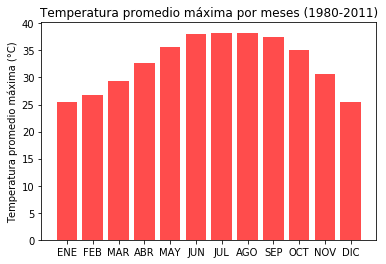

In [27]:
#Creando gráfica para temperatura promedio máxima en cada mes
Meses = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC')
y_pos = np.arange(len(Meses))
SumPre= [TMAX_ENE,TMAX_FEB,TMAX_MAR,TMAX_ABR,TMAX_MAY,TMAX_JUN,TMAX_JUL,TMAX_AGO,TMAX_SEP,TMAX_OCT,TMAX_NOV,TMAX_DIC]
 
plt.bar(y_pos, SumPre, align='center', alpha=0.7,color='r')
plt.xticks(y_pos, Meses)
plt.ylabel('Temperatura promedio máxima (°C)')
plt.title('Temperatura promedio máxima por meses (1980-2011)')
plt.savefig('Temperaturapromax_mensual',plt=2000)
plt.show()

In [28]:
#Contando los años en el archivo
df.AÑO.nunique()

32

In [29]:
#Creando arreglo de años y precipitación máxima por año
init = 1980
AÑOS = [init + i for i in range(0, 32)]
PAÑO = [ df[df.AÑO==(init + i)].PRECIP.sum() for i in range(0, 32)]

In [30]:
#Creando dataframe para años y precipitación máxima en cada año
#df2 = pd.DataFrame(np.array([AÑOS, PAÑO]),columns=['AÑO', 'PRECIPITACÍÓN_TOTAL'])
d = {'AÑO': AÑOS, 'PRECIPITACIÓN_TOTAL': PAÑO}
df2 = pd.DataFrame(data=d)
df2.head()

,AÑO,PRECIPITACIÓN_TOTAL
0,1980,182.5
1,1981,477.5
2,1982,217.5
3,1983,92.5
4,1984,579.5


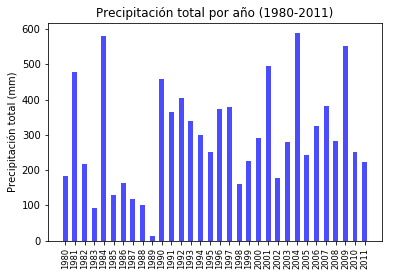

In [31]:
#Creando gráfica para precipitación total por año
fecha = AÑOS
N = np.arange(len(fecha))
PRECIPIT= PAÑO
 
plt.bar(N, PRECIPIT,  width=0.5,align='center', alpha=0.7,color='b')
plt.xticks(N, fecha, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación total por año (1980-2011)')
plt.savefig('Precip_anual',plt=2000)
plt.show()

In [32]:
#Ubicando el índice donde se ubica la precipitación máxima
pmax=df2.PRECIPITACIÓN_TOTAL.idxmax()
pmax

24

In [33]:
#Ubicando la precipitación máxima
df2.iloc[[pmax]]

,AÑO,PRECIPITACIÓN_TOTAL
24,2004,587.4


In [34]:
#Ubicando el índice donde se ubica la precipitación mínima
pmin=df2.PRECIPITACIÓN_TOTAL.idxmin()
pmin

9

In [35]:
#Ubicando la precipitación mínima
df2.iloc[[pmin]]

,AÑO,PRECIPITACIÓN_TOTAL
9,1989,14.0


In [36]:
#3 años más lluviosos
df2.nsmallest(3,'PRECIPITACIÓN_TOTAL', keep='first')

,AÑO,PRECIPITACIÓN_TOTAL
9,1989,14.0
3,1983,92.5
8,1988,101.0


In [37]:
#3 años más secos
df2.nlargest(3,'PRECIPITACIÓN_TOTAL', keep='first')

,AÑO,PRECIPITACIÓN_TOTAL
24,2004,587.4
4,1984,579.5
29,2009,551.5


In [38]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [39]:
#Se seleccionan los datos de los meses de invierno 
TINV = pd.DataFrame(df.loc[df['MES'].isin([12,1,2])])
TINV.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [40]:
#Se crea un arreglo de temperaturas promedio máximas y mínimas de invierno en cada año
TINVMAXANUAL = [TINV[TINV.AÑO==(init + i)].TMAX.mean() for i in range(0, 32)]
TINVMINANUAL = [TINV[TINV.AÑO==(init + i)].TMIN.mean() for i in range(0,32)]

In [41]:
#Creando dataframe para temperaturas prom en inviernos por año
d3 = {'AÑO': AÑOS, 'TINVMAXANUAL': TINVMAXANUAL,'TINVMINANUAL':TINVMINANUAL }
df3 = pd.DataFrame(data=d3)
df3

,AÑO,TINVMAXANUAL,TINVMINANUAL
0,1980,26.043956,9.461538
1,1981,25.788889,9.477778
2,1982,23.922222,7.688889
3,1983,25.305085,8.254237
4,1984,25.010989,8.000000
5,1985,23.955556,6.800000
6,1986,27.525424,8.220339
7,1987,24.580645,5.145161
8,1988,25.790698,6.091954
9,1989,22.193548,4.548387


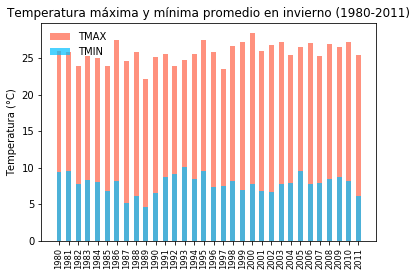

In [42]:
#Creando gráfica para temperatura promedio mínima y máxima en inviernos por año

N = np.arange(len(fecha)) 

plt.bar(N,TINVMAXANUAL, width=0.5, align='center', alpha=0.7,color='#FF6347')
plt.xticks(N, AÑOS, size = 'small', color = 'r', rotation = 90)

plt.bar(N, TINVMINANUAL, width=0.5, align='center', alpha=0.7,color='#00BFFF')
plt.xticks(N, AÑOS, size = 'small', color = 'k', rotation = 90)

plt.ylabel('Temperatura (°C)')
plt.title('Temperatura máxima y mínima promedio en invierno (1980-2011)')
plt.gca().legend(('TMAX','TMIN'),frameon=False,loc='upper left')
plt.savefig('Temperaturasprom_invierno',plt=2000)
plt.show()



In [43]:
#Ubicando el índice donde se ubica la temperatura mínima
min=df3.TINVMAXANUAL.idxmin()
df3.iloc[[min]]

,AÑO,TINVMAXANUAL,TINVMINANUAL
9,1989,22.193548,4.548387


In [44]:
#Temperaturas mínimas
df3.nsmallest(5,'TINVMAXANUAL', keep='first')

,AÑO,TINVMAXANUAL,TINVMINANUAL
9,1989,22.193548,4.548387
17,1997,23.572222,7.416667
12,1992,23.901099,9.120879
2,1982,23.922222,7.688889
5,1985,23.955556,6.800000


In [45]:
df3.nsmallest(5,'TINVMINANUAL', keep='first')

,AÑO,TINVMAXANUAL,TINVMINANUAL
9,1989,22.193548,4.548387
7,1987,24.580645,5.145161
8,1988,25.790698,6.091954
31,2011,25.466667,6.116667
10,1990,25.122222,6.511111


In [46]:
#Ubicando el índice donde se ubica la temperatura mínima
df3.TINVMINANUAL.idxmax()

13

In [47]:
df3.iloc[[13]]

,AÑO,TINVMAXANUAL,TINVMINANUAL
13,1993,24.805556,10.016667


In [48]:
#Se seleccionan las temperaturas máximas y mínimas de los meses de verano 
TVER = pd.DataFrame(df.loc[df['MES'].isin([6,7,8,9])])
TVER.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
152,0.0,7.0,37.0,19.0,1980-06-01,6,1980
153,0.0,7.9,37.0,17.0,1980-06-02,6,1980
154,0.0,9.3,35.0,18.0,1980-06-03,6,1980
155,0.0,11.4,39.0,19.0,1980-06-04,6,1980
156,0.0,8.7,35.0,18.0,1980-06-05,6,1980


In [49]:
#Se crea un arreglo de temperaturas promedio máximas y mínimas de verano en cada año 
TVERMAXANUAL = [TVER[TVER.AÑO==(init + i)].TMAX.mean() for i in range(0, 32)]
TVERMINANUAL = [TVER[TVER.AÑO==(init + i)].TMIN.mean() for i in range(0, 32)]

In [50]:
#Creando dataframe para temperaturas prom en verano por año
d4 = {'AÑO': AÑOS, 'TVERMAXANUAL': TVERMAXANUAL,'TVERMINANUAL':TVERMINANUAL }
df4 = pd.DataFrame(data=d4)
df4

,AÑO,TVERMAXANUAL,TVERMINANUAL
0,1980,36.081967,24.852459
1,1981,35.319672,23.762295
2,1982,36.598361,22.745902
3,1983,NaN,NaN
4,1984,35.065574,22.770492
5,1985,NaN,NaN
6,1986,35.295082,23.163934
7,1987,37.494505,21.615385
8,1988,38.540984,24.040984
9,1989,NaN,NaN


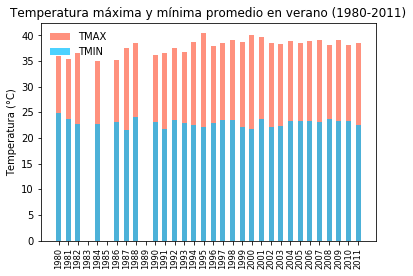

In [51]:
#Creando gráfica para temperatura promedio mínima y máxima en verano por año

N = np.arange(len(AÑOS)) 

plt.bar(N,TVERMAXANUAL, width=0.5, align='center', alpha=0.7,color='#FF6347')
plt.xticks(N, AÑOS, size = 'small', color = 'r', rotation = 90)

plt.bar(N, TVERMINANUAL, width=0.5, align='center', alpha=0.7,color='#00BFFF')
plt.xticks(N, AÑOS, size = 'small', color = 'k', rotation = 90)

plt.ylabel('Temperatura (°C)')
plt.title('Temperatura máxima y mínima promedio en verano (1980-2011)')
plt.gca().legend(('TMAX','TMIN'),frameon=False,loc='upper left')
plt.savefig('Temperaturasprom_verano',plt=2000)
plt.show()



In [52]:
#Temperaturas mínimas
df4.nlargest(5,'TVERMAXANUAL', keep='first')

,AÑO,TVERMAXANUAL,TVERMINANUAL
15,1995,40.389344,22.225410
20,2000,40.020492,21.659836
21,2001,39.782787,23.622951
18,1998,39.176230,23.508197
29,2009,39.150000,23.385246


In [53]:
#Creando arreglos de temperatura promedio máxima y mínima anual
init = 1980
AÑOS = [init + i for i in range(0, 32)]
TMAXANUAL = [df[df.AÑO==(init + i)].TMAX.mean() for i in range(0, 32)]
TMINANUAL = [df[df.AÑO==(init + i)].TMIN.mean() for i in range(0, 32)]

In [54]:
#Creando dataframe para temperatura promedio máxima y mínima anual
d5 = {'AÑO': AÑOS, 'TMAXANUAL': TMAXANUAL,'TMINANUAL':TMINANUAL }
df5 = pd.DataFrame(data=d5)
df5

,AÑO,TMAXANUAL,TMINANUAL
0,1980,31.431694,16.181694
1,1981,31.073973,16.008219
2,1982,31.394521,14.813699
3,1983,27.158333,8.800000
4,1984,30.625455,15.483636
5,1985,27.049451,9.313187
6,1986,31.731405,14.409091
7,1987,31.702041,13.469388
8,1988,32.093333,12.581395
9,1989,22.193548,4.548387


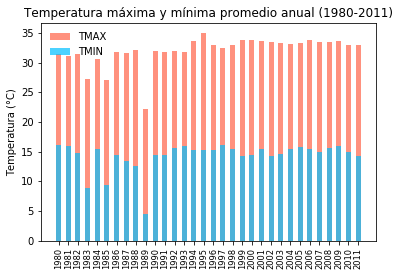

In [55]:
#Creando gráfica para temperatura promedio mínima y máxima por año
N = np.arange(len(AÑOS)) 

plt.bar(N,TMAXANUAL, width=0.5, align='center', alpha=0.7,color='#FF6347')
plt.xticks(N, AÑOS, size = 'small', color = 'r', rotation = 90)

plt.bar(N, TMINANUAL, width=0.5, align='center', alpha=0.7,color='#00BFFF')
plt.xticks(N, AÑOS, size = 'small', color = 'k', rotation = 90)

plt.ylabel('Temperatura (°C)')
plt.title('Temperatura máxima y mínima promedio anual (1980-2011)')
plt.gca().legend(('TMAX','TMIN'),frameon=False,loc='upper left')
plt.savefig('Temperaturasprom_anual',plt=2000)
plt.show()